In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import tensorflow as tf
import os
import numpy as np
import PIL

from PIL import Image
from glob import glob

In [ ]:
root = '/content/drive/MyDrive/pic2/dacon1/train/'
training_images = []
training_labels = []

for filename in glob(root +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        training_images.append(img_array)
        label = filename.split('\\')[-1]
        training_labels.append(label)
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
root2 = '/content/drive/MyDrive/pic2/dacon1/test/'
test_images = []
test_idx = []

flist = sorted(glob(root2 + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename)
    img_array = np.array(an_img)
    test_images.append(img_array)
    label = filename.split('\\')[-1]
    test_idx.append(label)
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:3])

(10000, 32, 32, 3)
['/content/drive/MyDrive/pic2/dacon1/test/0000.jpg', '/content/drive/MyDrive/pic2/dacon1/test/0001.jpg', '/content/drive/MyDrive/pic2/dacon1/test/0002.jpg']


[7],[3],[9],[5],[1],[8],[4],[2],[6],[0],

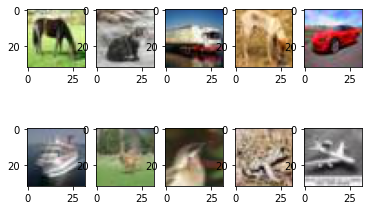

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i*5000])
    print(training_labels[i*5000], end=",")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

image_generator = ImageDataGenerator(
    rotation_range=45,
    brightness_range = [0.7, 1.0],
    zoom_range=0.4,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    vertical_flip = False
)

In [ ]:
augment_size=150000

np.random.seed(42)

mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image2 = training_images[mask].copy()
training_labels2 = training_labels[mask].copy()

In [ ]:
training_image2 = image_generator.flow(training_image2, np.zeros(augment_size), batch_size=augment_size, shuffle=False, seed = 42).next()[0]

training_images = np.concatenate((training_images, training_image2))
training_labels = np.concatenate((training_labels, training_labels2))

In [ ]:
print(training_images.shape)
print(training_labels.shape)

(200000, 32, 32, 3)
(200000, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, stratify = training_labels, test_size=0.05, random_state=42)
X_test = test_images

In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
transfer_model = VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))
transfer_model.trainable = False

model = Sequential([
    transfer_model, 
    Flatten(), 
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(10, activation='softmax')
])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#steps_per_epoch과 validation_steps크기를 알아보기 위한 수식

steps_per_epoch = len(X_train)// 128
validation_steps = len(X_test)// 128 # --> 128은 배치 사이즈 갯수이다.

print(steps_per_epoch, validation_steps)

1484 78


In [15]:
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), steps_per_epoch = 1484, epochs = 40, validation_steps = 78, batch_size = 64, verbose = 2)

Epoch 1/40
1484/1484 - 48s - loss: 1.8212 - accuracy: 0.3498 - val_loss: 1.6086 - val_accuracy: 0.4415 - 48s/epoch - 32ms/step
Epoch 2/40
1484/1484 - 36s - loss: 1.6825 - accuracy: 0.4064 - val_loss: 1.5525 - val_accuracy: 0.4449 - 36s/epoch - 24ms/step
Epoch 3/40
1484/1484 - 37s - loss: 1.6448 - accuracy: 0.4200 - val_loss: 1.5294 - val_accuracy: 0.4625 - 37s/epoch - 25ms/step
Epoch 4/40
1484/1484 - 36s - loss: 1.6271 - accuracy: 0.4258 - val_loss: 1.5074 - val_accuracy: 0.4732 - 36s/epoch - 24ms/step
Epoch 5/40
1484/1484 - 36s - loss: 1.6080 - accuracy: 0.4366 - val_loss: 1.4969 - val_accuracy: 0.4716 - 36s/epoch - 24ms/step
Epoch 6/40
1484/1484 - 36s - loss: 1.6044 - accuracy: 0.4349 - val_loss: 1.4877 - val_accuracy: 0.4720 - 36s/epoch - 24ms/step
Epoch 7/40
1484/1484 - 36s - loss: 1.5923 - accuracy: 0.4406 - val_loss: 1.4883 - val_accuracy: 0.4685 - 36s/epoch - 24ms/step
Epoch 8/40
1484/1484 - 36s - loss: 1.5891 - accuracy: 0.4436 - val_loss: 1.4757 - val_accuracy: 0.4814 - 36s/ep

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-1dee849ce5ee>", line 1, in <module>
    model.fit(X_train, y_train, validation_data = (X_valid, y_valid), steps_per_epoch = 1484, epochs = 40, validation_steps = 78, batch_size = 64, verbose = 2)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1384, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "/us

KeyboardInterrupt: ignored